# Importing Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [86]:
df = pd.read_csv('vehiclesFinal.csv')
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


# Basic Information about Dataset

In [87]:
df.describe()

,id,year,odometer,lat,long,price
count,3.742220e+05,374222.000000,374222.000000,374222.000000,374222.000000,374222.000000
mean,7.115975e+09,2011.170933,99082.730455,38.467335,-94.839612,14251.653588
std,4.583794e+06,5.264778,56671.829463,6.089110,17.994045,11137.719627
min,7.104271e+09,1995.000000,0.000000,-83.197100,-177.012000,699.000000
25%,7.112466e+09,2008.000000,53503.250000,34.245500,-110.979000,6000.000000
50%,7.117111e+09,2012.000000,97235.000000,39.049600,-89.438545,11500.000000
75%,7.120107e+09,2015.000000,138134.000000,42.510000,-81.431300,18995.000000
max,7.121608e+09,2021.000000,268564.000000,79.601900,139.388000,126000.000000


In [88]:
df.describe(exclude='number')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
count,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222
unique,402,41,27908,6,8,5,6,3,3,4,13,12
top,springfield,ford,f-150,fair,5 cylinders,gas,clean,automatic,4wd,full-size,offroad,grey
freq,3053,66329,7009,158429,141407,325266,354719,338265,226906,318879,96965,138308


In [89]:
df.dtypes

id                int64
region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
price             int64
dtype: object

In [90]:
df.shape

(374222, 18)

In [91]:
df.columns

Index(['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price'],
      dtype='object')

In [92]:
df = df.drop(['id', 'region', 'lat', 'long'], axis=1)

# Data Preprocessing

In [93]:
df.dtypes

year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
price             int64
dtype: object

## Handling Missing Values
#### Identify and handle missing data through techniques such as imputation, removal, or filling with default values.

In [94]:
df.isna().sum()

year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
price           0
dtype: int64

In [95]:
# Removing 'cylinders' from cylinders column

df['cylinders'] = df['cylinders'].str.extract('(\d+)')

In [96]:
df.isna().sum()

year              0
manufacturer      0
model             0
condition         0
cylinders       840
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
size              0
type              0
paint_color       0
price             0
dtype: int64

In [97]:
df['cylinders'].fillna(method='bfill', inplace=True)
# df['cylinders'].ffill()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9400\1042531318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(method='bfill', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9400\1042531318.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cylinders'].fillna(method='bfill', inplace=True)


In [98]:
df.isna().sum()

year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
price           0
dtype: int64

In [99]:
df['cylinders'].unique()

array(['4', '5', '6', '8', '10', '12', '3'], dtype=object)

In [100]:
df['year'] = df['year'].astype(int)

In [101]:
df['year'].nunique()

27

In [102]:
# Converting dtype of 'odometer' to int

df['odometer'] = df['odometer'].astype(int)

### Handling Duplicates

In [103]:
df['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [104]:
df.head()

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,2012,jeep,patriot,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,silver,3495
1,2014,bmw,328i m-sport,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,grey,13750
2,2001,dodge,caravan,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,grey,2300
3,2004,chevrolet,colorado ls,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,red,9000
4,2005,ford,mustang convertible,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,silver,8500


In [105]:
# Extracting Numerical Columns
num_features = df.select_dtypes('number').columns
num_features

Index(['year', 'odometer', 'price'], dtype='object')

In [106]:
# Extracting Categorical Columns
cat_features = df.select_dtypes(exclude='number').columns
cat_features

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

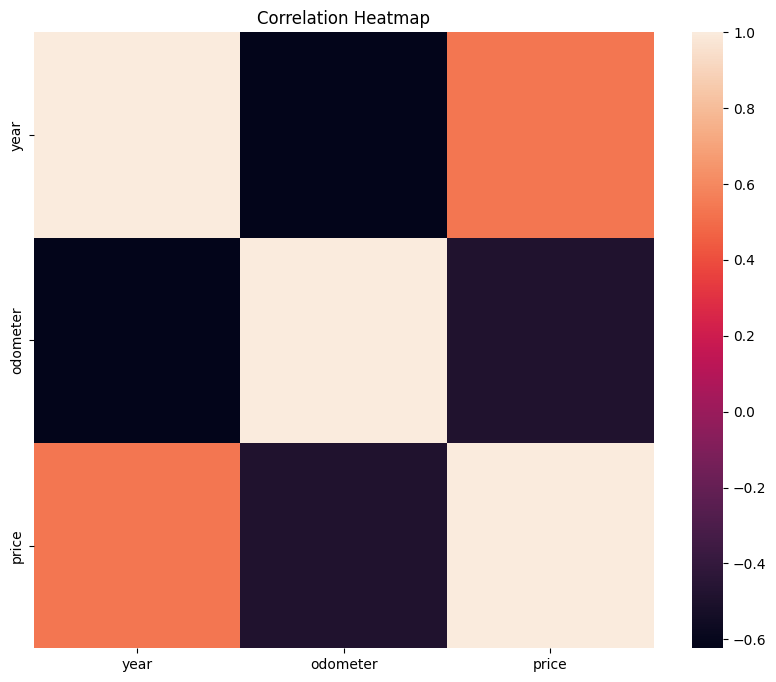

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr())
plt.title('Correlation Heatmap')

<Axes: >

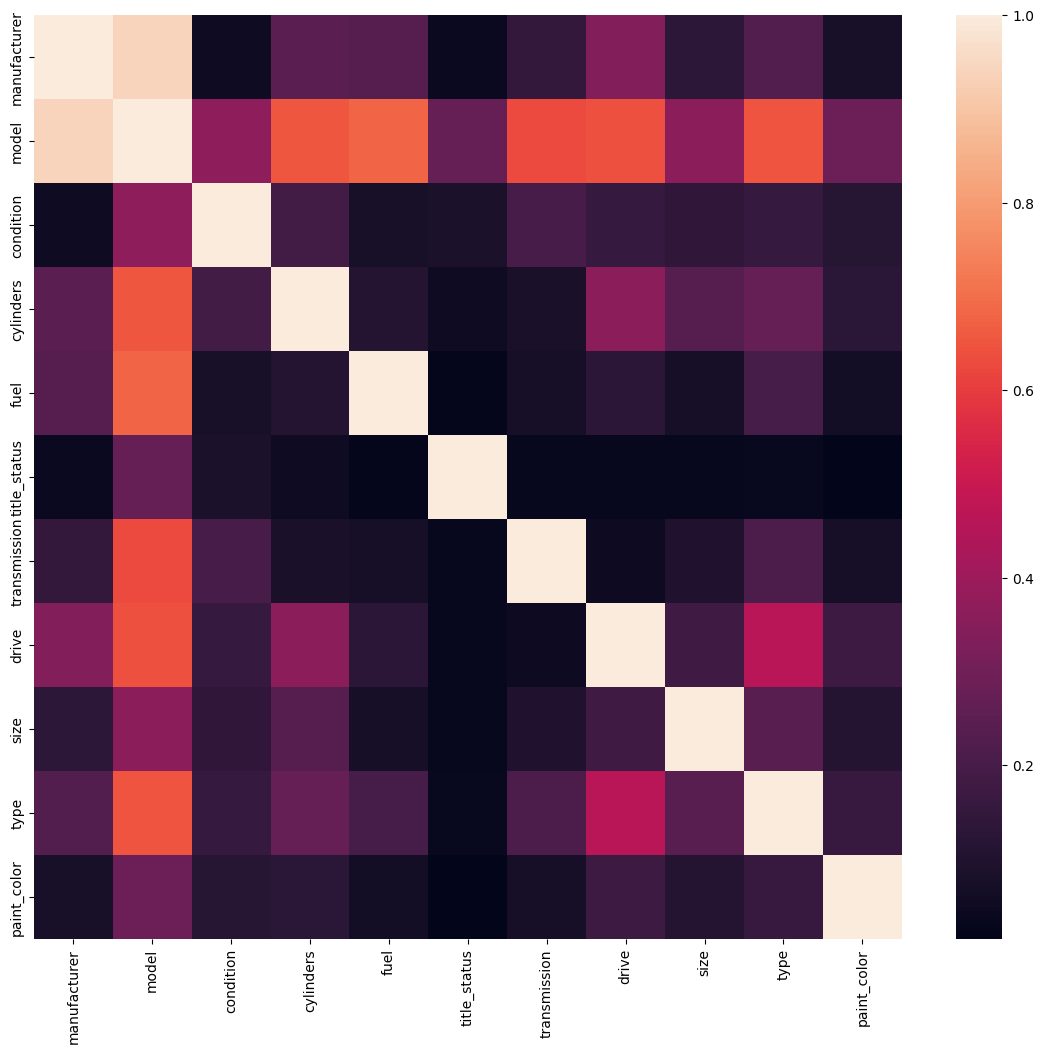

In [108]:
from dython.nominal import associations

assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)

In [109]:
# Boolean Duplicates

df_duplicates = df.duplicated()
print(df_duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
374217    False
374218    False
374219    False
374220     True
374221    False
Length: 374222, dtype: bool


In [110]:
# Identifying Duplicates Rows

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

        year   manufacturer                         model  condition  \
603     2020       infiniti  SPECIAL FINANCE PROGRAM 2020       fair   
694     2013      chevrolet              silverado 2500hd  excellent   
711     2005      chevrolet                    equinox lt       fair   
833     2014           ford     mustang gt convertible 2d       good   
846     2016           ford   mustang gt premium coupe 2d       good   
...      ...            ...                           ...        ...   
374207  2014        hyundai                       elantra       fair   
374209  2004  mercedes-benz                       c-class  excellent   
374210  2015      chevrolet                      cruze rs  excellent   
374214  2017           audi               q3 premium plus  excellent   
374220  2013          mazda                        mazda3       fair   

       cylinders    fuel  odometer title_status transmission drive       size  \
603            5   other      5832        clean       

In [111]:
# Controlling Duplicates Detection with 'Keep'

all_duplicates = df[df.duplicated(keep=False)]
print(all_duplicates)

        year   manufacturer                      model  condition cylinders  \
2       2001          dodge                    caravan  excellent         6   
5       2004          honda  odyssey ex-l, reliable, e       fair         6   
6       2017         toyota   tacoma sr v6 - trd off r       fair         6   
12      2010           ford  e-series cargo e-250 work       fair         8   
13      2018         toyota   tacoma sr v6, 6" lift, x       fair         6   
...      ...            ...                        ...        ...       ...   
374207  2014        hyundai                    elantra       fair         5   
374209  2004  mercedes-benz                    c-class  excellent         6   
374210  2015      chevrolet                   cruze rs  excellent         4   
374214  2017           audi            q3 premium plus  excellent         4   
374220  2013          mazda                     mazda3       fair         5   

       fuel  odometer title_status transmission dri

In [112]:
# Removing duplicate rows
df_no_duplicates = df.drop_duplicates()

In [113]:
df.shape

(374222, 14)

### Outliers

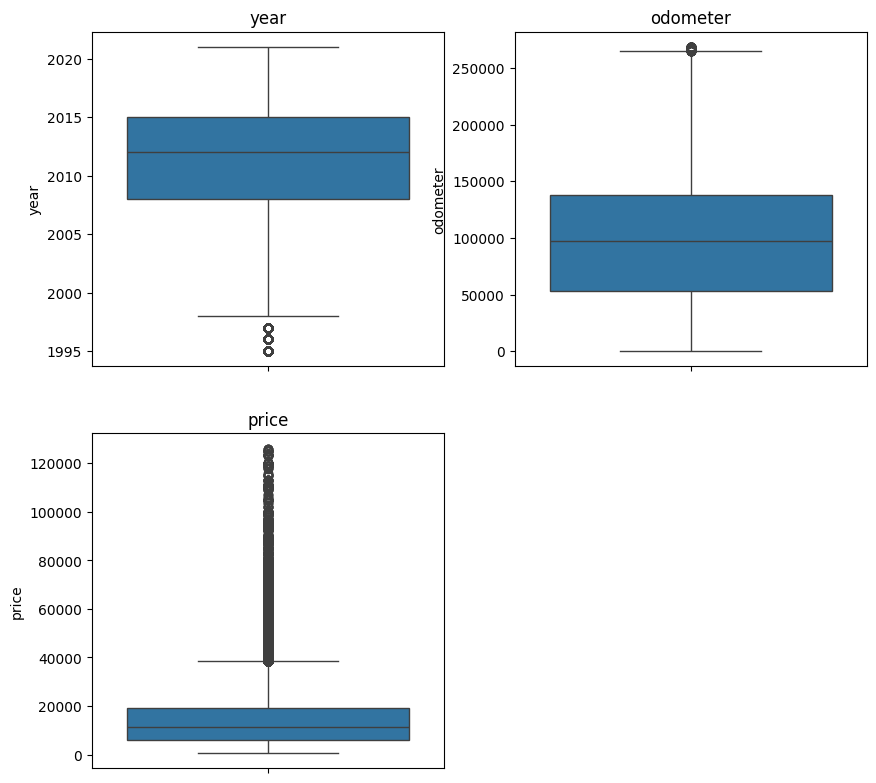

In [114]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=df[col])
    plt.title(col)

In [115]:
for col in num_features:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    threshold = 3
    df = df[z_scores < threshold]

In [116]:
df.shape

(367215, 14)

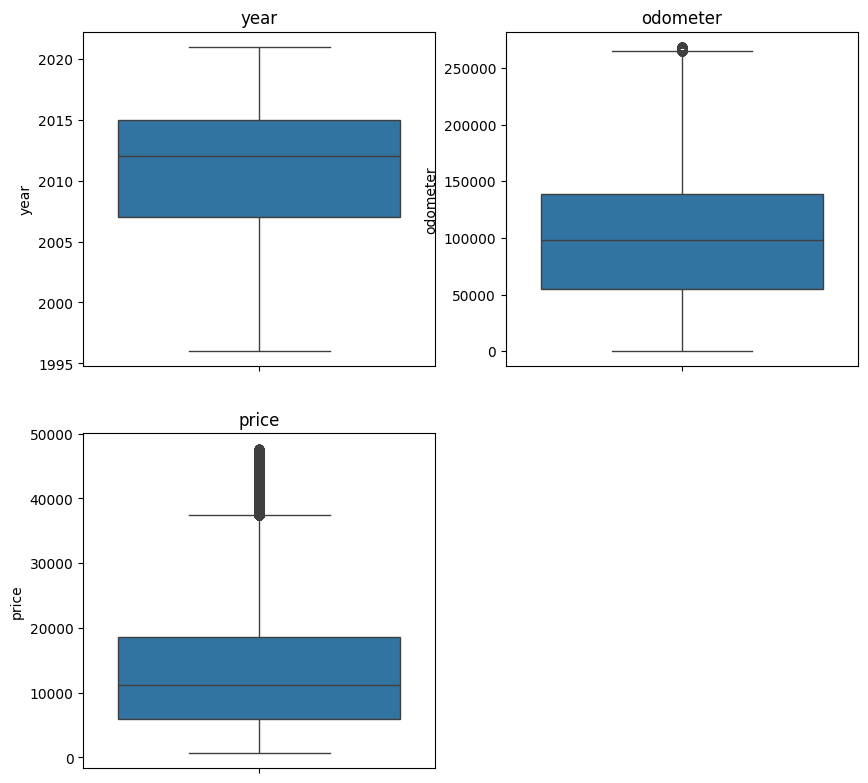

In [117]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=df[col])
    plt.title(col)

# Data Visualization

#### Year vs Count of Cars

In [118]:
car_count_by_year = df.groupby('year').size()
print(len(car_count_by_year))

26


In [119]:
car_counts = df['year'].value_counts().sort_index()

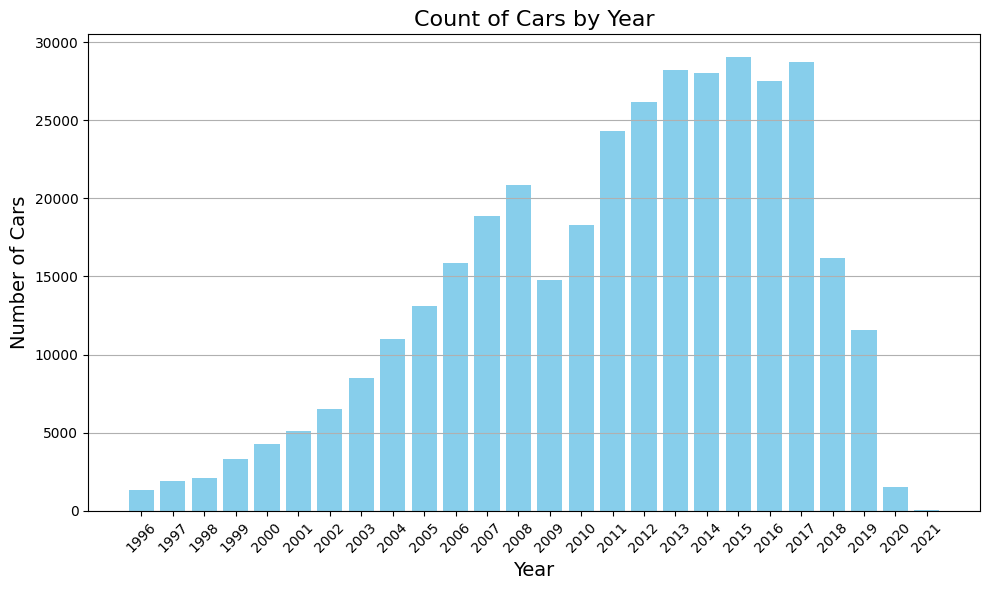

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(car_counts.index.astype(str), car_counts.values, color='skyblue')
plt.title('Count of Cars by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Condition vs Count of Cars

In [121]:
condition_counts = df['condition'].value_counts().sort_index()

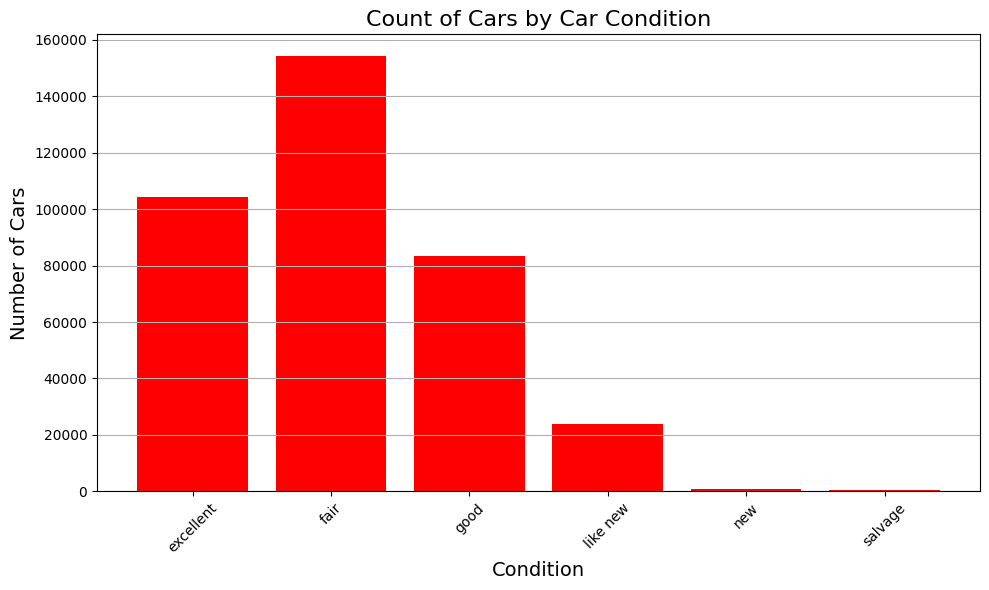

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(condition_counts.index.astype(str), condition_counts.values, color='red')
plt.title('Count of Cars by Car Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Cylinders vs Count of Cars

In [123]:
cylinders_counts = df['cylinders'].value_counts().sort_index()

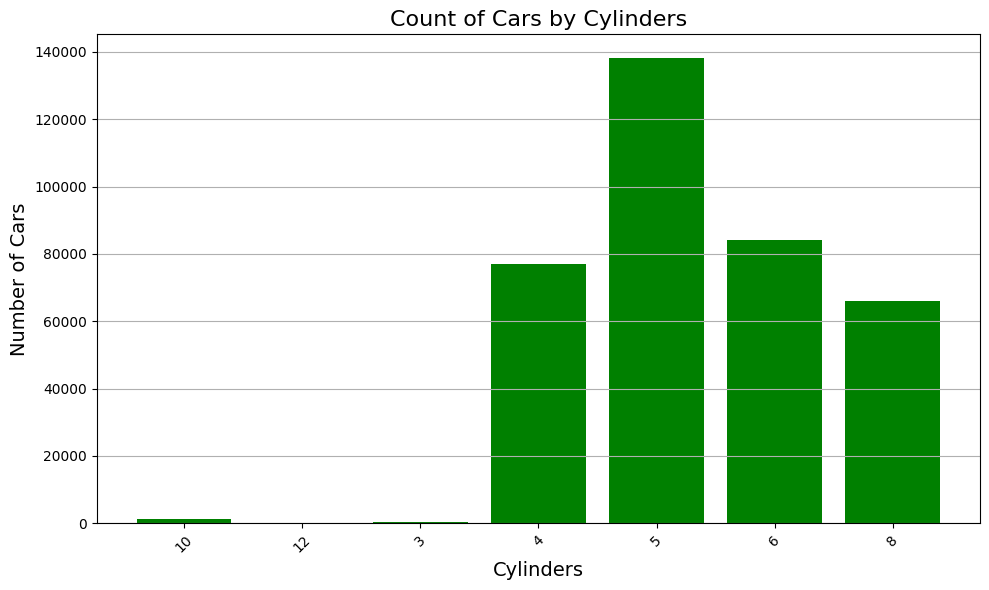

In [124]:
plt.figure(figsize=(10, 6))
plt.bar(cylinders_counts.index.astype(str), cylinders_counts.values, color='green')
plt.title('Count of Cars by Cylinders', fontsize=16)
plt.xlabel('Cylinders', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Fuel vs Count of Cars

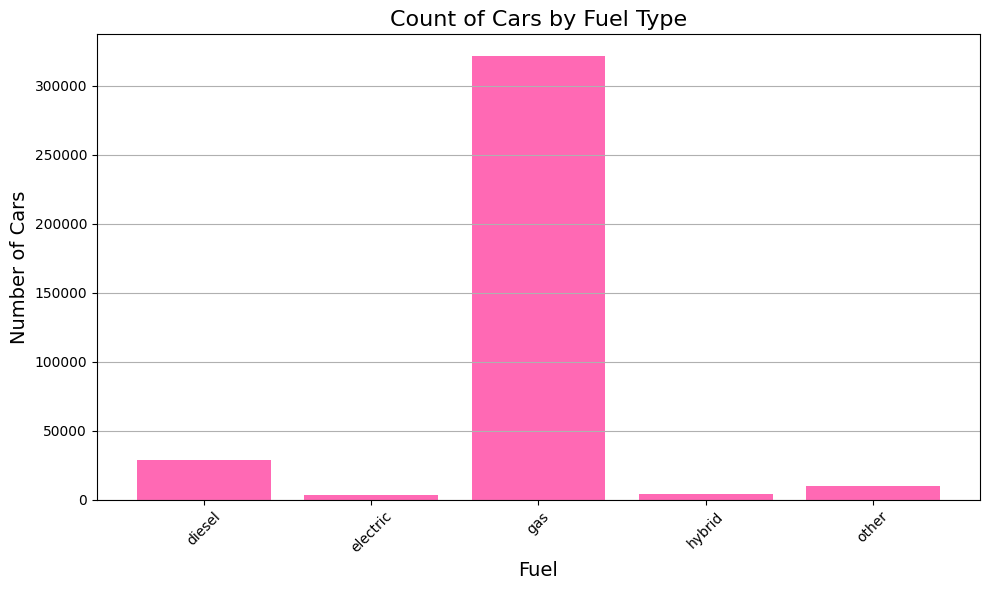

In [125]:
fuel_counts = df['fuel'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(fuel_counts.index.astype(str), fuel_counts.values, color='hotpink')
plt.title('Count of Cars by Fuel Type', fontsize=16)
plt.xlabel('Fuel', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Transmission vs Count of Cars

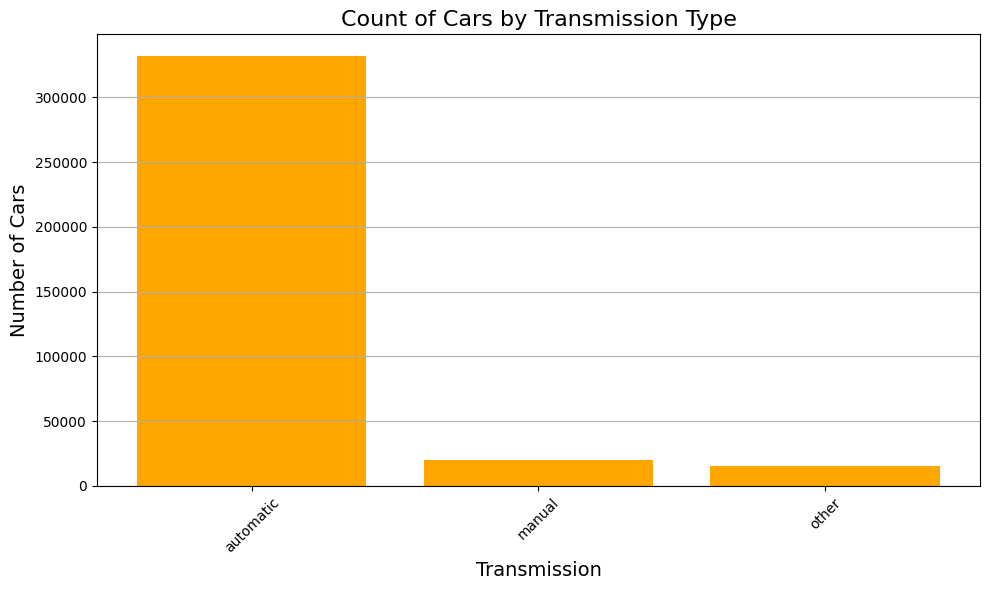

In [126]:
transmission_counts = df['transmission'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(transmission_counts.index.astype(str), transmission_counts.values, color='orange')
plt.title('Count of Cars by Transmission Type', fontsize=16)
plt.xlabel('Transmission', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Size Count

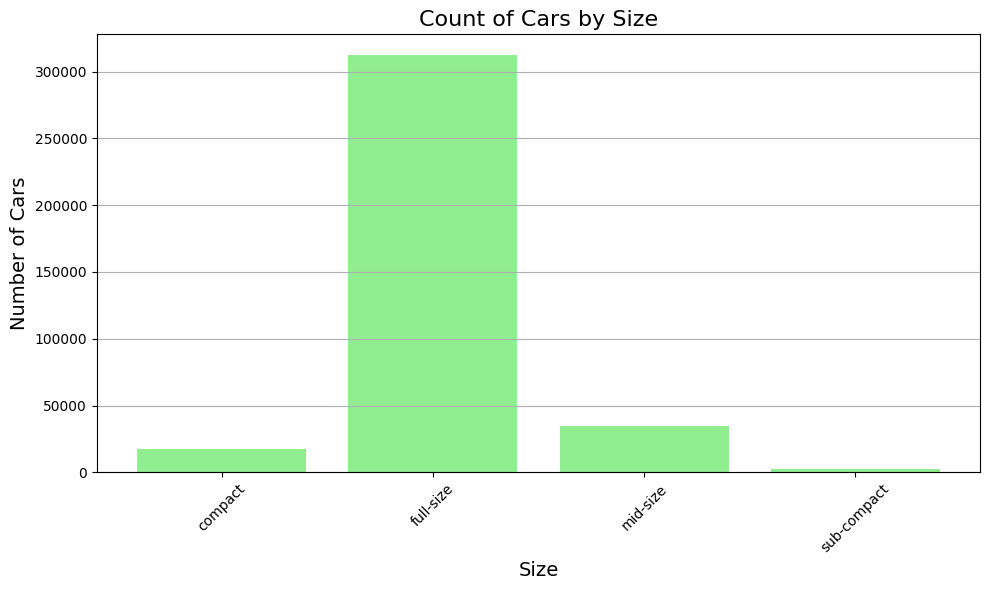

In [127]:
size_counts = df['size'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(size_counts.index.astype(str), size_counts.values, color='lightgreen')
plt.title('Count of Cars by Size', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Type Counts

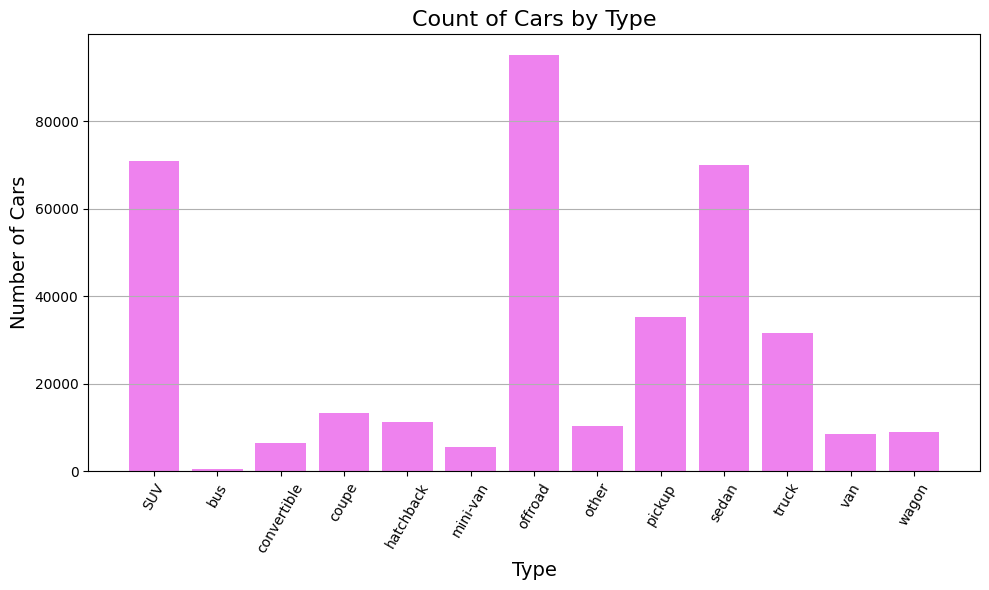

In [128]:
type_counts = df['type'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(type_counts.index.astype(str), type_counts.values, color='violet')
plt.title('Count of Cars by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Title Status Count

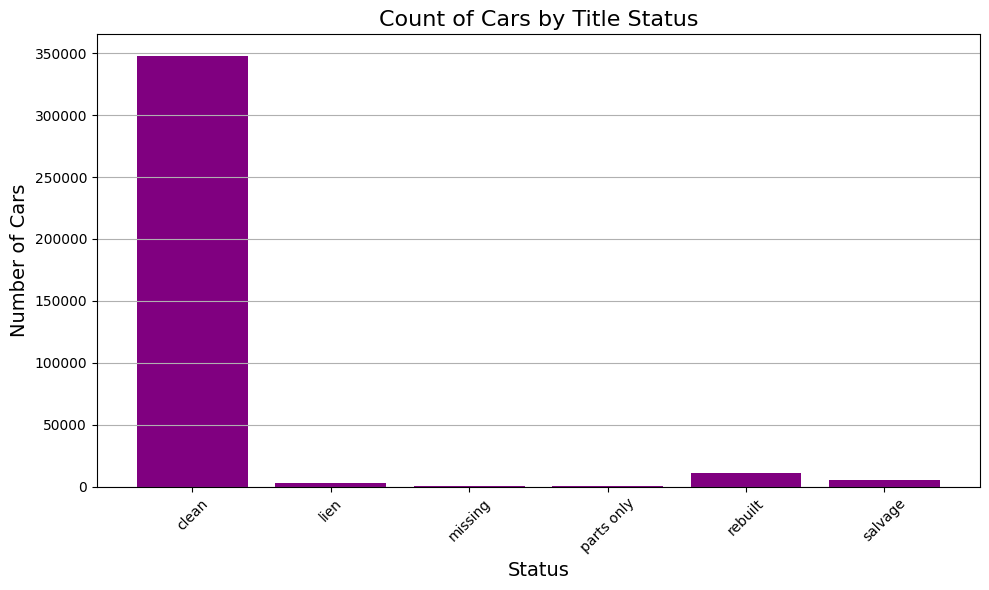

In [129]:
title_status_counts = df['title_status'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(title_status_counts.index.astype(str), title_status_counts.values, color='purple')
plt.title('Count of Cars by Title Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Drive Count

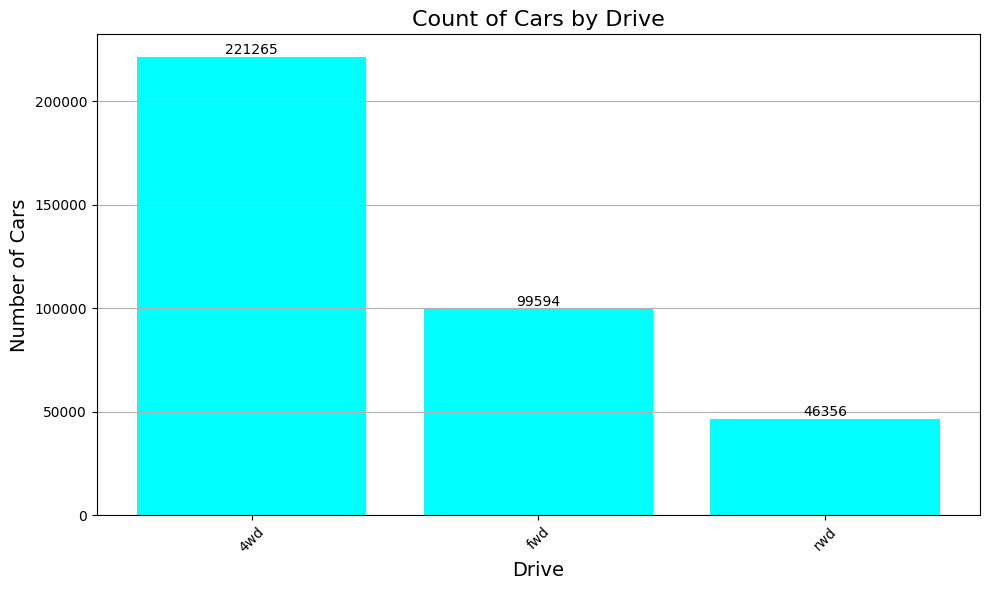

In [130]:
drive_counts = df['drive'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

bars = plt.bar(drive_counts.index.astype(str), drive_counts.values, color='aqua')

plt.bar(drive_counts.index.astype(str), drive_counts.values, color='aqua')
plt.title('Count of Cars by Drive', fontsize=16)
plt.xlabel('Drive', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Year vs Average Price

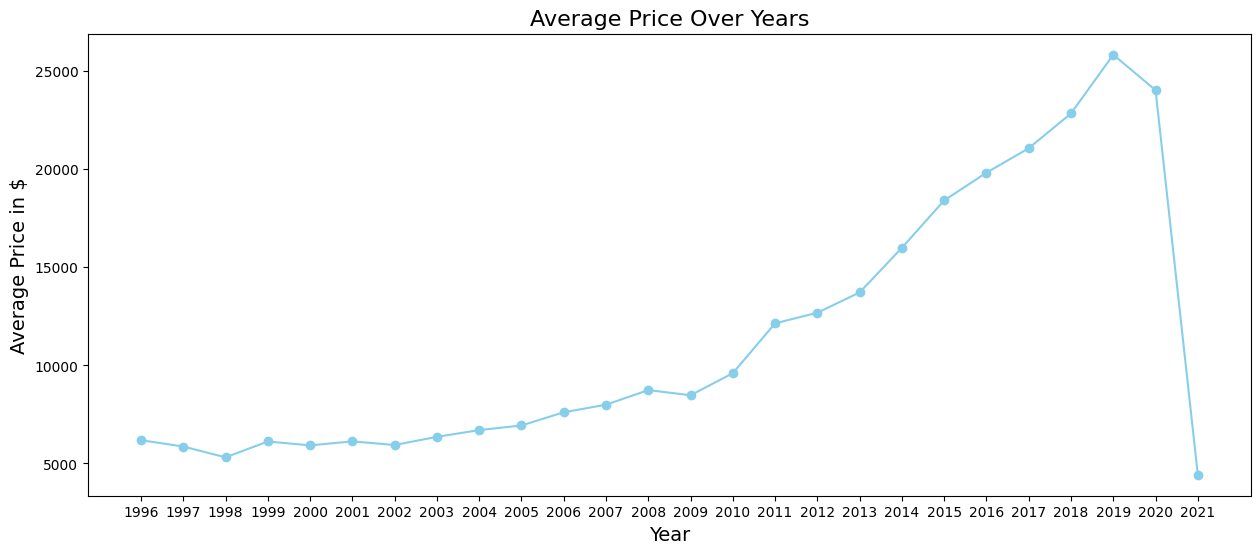

In [131]:
average_price_per_year = df.groupby('year')['price'].mean().reset_index().astype(int)
average_price_per_year.columns = ['Year', 'Average Price']  # Rename columns for clarity

plt.figure(figsize=(15, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Average Price'], marker='o', color='skyblue', linestyle='-')
plt.title('Average Price Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price in $', fontsize=14)
plt.xticks(average_price_per_year['Year'])
plt.show()

# Next Step

In [132]:
df.head()

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,2012,jeep,patriot,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,silver,3495
1,2014,bmw,328i m-sport,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,grey,13750
2,2001,dodge,caravan,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,grey,2300
3,2004,chevrolet,colorado ls,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,red,9000
4,2005,ford,mustang convertible,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,silver,8500


In [133]:
for i in num_features:
    print(f'{i} : ', df[i].nunique())

year :  26
odometer :  111389
price :  14804


In [134]:
for i in cat_features:
    print(f'{i} : ', df[i].nunique())

manufacturer :  41
model :  27055
condition :  6
cylinders :  7
fuel :  5
title_status :  6
transmission :  3
drive :  3
size :  4
type :  13
paint_color :  12


# Feature Scaling
### Normalize or standardize features to bring them into a similar range, which improves model performance. Common methods include Min-Max scaling and Z-score normalization.

# Split the Dataset
### Divide the dataset into training, validation, and test sets to evaluate model performance effectively.

# Feature Engineering
### Create new features or modify existing ones to enhance model performance based on domain knowledge.

# Data Transformation
### Apply transformations to change the format of data, such as logarithmic transformations for skewed distributions.

# Data Reduction
### Reduce dimensionality using techniques like Principal Component Analysis (PCA) to simplify the dataset while retaining essential information.